# k-means-u and k-means-u* - advanced examples

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import matplotlib
import bottleneck as bn
import copy
import math
import random
from bfdataset import dataset
from bfutil import plot3, errorOf, eqlim, noticks, finish, whoami, makeplot
from kmeansu import kmeansU, getMap
from collections import Counter
from scipy.spatial import Voronoi, voronoi_plot_2d
import warnings
warnings.filterwarnings('ignore')

# Figure: good and poor centers for gaussian mixture distribution

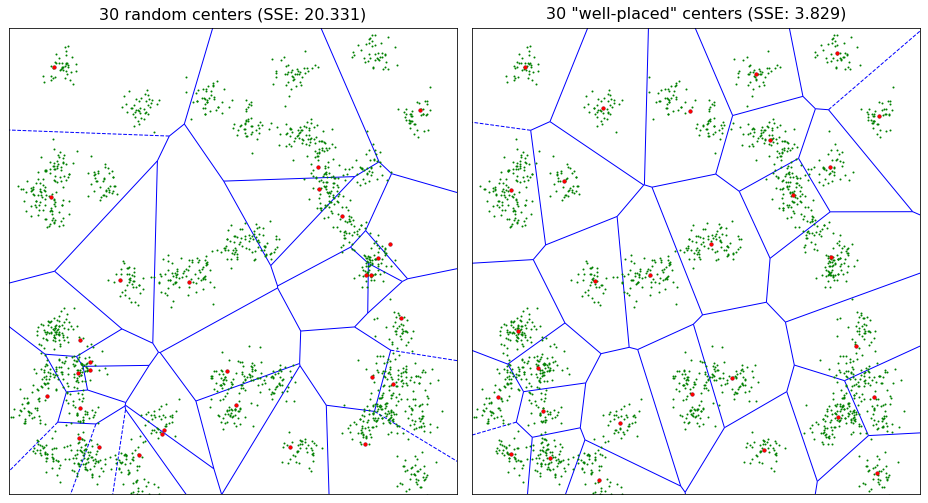

In [2]:
def fig_gaussians():

    #D = dataset.grid(so=5,si=6,ratio=1,grid1=0,grid2=0,sig=0.0005)
    D = dataset.gaussmix(n=2000,g=50, sig=0.0005)
    D.k = 30
    X=D.getData()

    D.randomInit()# initialize random codebook 
    fig,axs = makeplot(1,2,figsize=(13,7.0))  
    plot3(ax=axs[0],X=X,C=D.ibook,
          cap=str(D.k)+" random centers"+" (SSE: %.3f)"%errorOf(D.ibook,X), ticks=0, voro=1)
    unit = (0.0, 1.0)

    kmeans = KMeans(n_clusters=D.k, init=D.ibook) # run k-means++
    kmeans.fit(X)
    kmeans = kmeansU(X,kmeans)   # result from k-means-u
    plot3(ax=axs[1],X=X,C=kmeans.cluster_centers_,
          cap=str(D.k)+" \"well-placed\" centers"+" (SSE: %.3f)"%errorOf(kmeans.cluster_centers_,X),
         voro=1, ticks=0)
    finish(fig,whoami())
    eqlim(axs)


fig_gaussians()

## random codebook, k-means solution and optimum

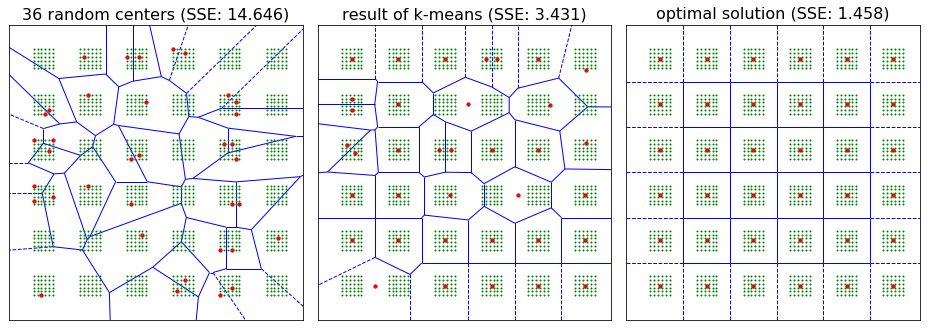

In [3]:
def fig_grid():

    D = dataset.grid(so=6,si=6,ratio=1,grid1=1,grid2=1,sig=0.0005)
    X=D.getData()

    D.randomInit()# initialize random codebook 
    fig,axs = makeplot(1,3,figsize=(13,4.50))  
    plot3(ax=axs[0],X=X,C=D.ibook,
          cap=str(D.k)+" random centers"+" (SSE: %.3f)"%errorOf(D.ibook,X), ticks=0, voro=1)
    unit = (0.0, 1.0)
    
    kmeans = KMeans(n_clusters=D.k, init=D.ibook) # run k-means++
    kmeans.fit(X)
    plot3(ax=axs[1],X=X,C=kmeans.cluster_centers_,
          cap="result of k-means"+" (SSE: %.3f)"%kmeans.inertia_, ticks=0, voro=1)
    unit = (0.0, 1.0)

    kmeans = kmeansU(X,kmeans)   # result from k-means-u
    plot3(ax=axs[2],X=X,C=kmeans.cluster_centers_,
          cap="optimal solution"+" (SSE: %.3f)"%errorOf(kmeans.cluster_centers_,X),
         voro=1, ticks=0)
    finish(fig,whoami(), write=0)
    eqlim(axs)


fig_grid()

# Figure: data set A and optimal solution for problem A-1

In [4]:
acc=3 # number of digits after decimal point

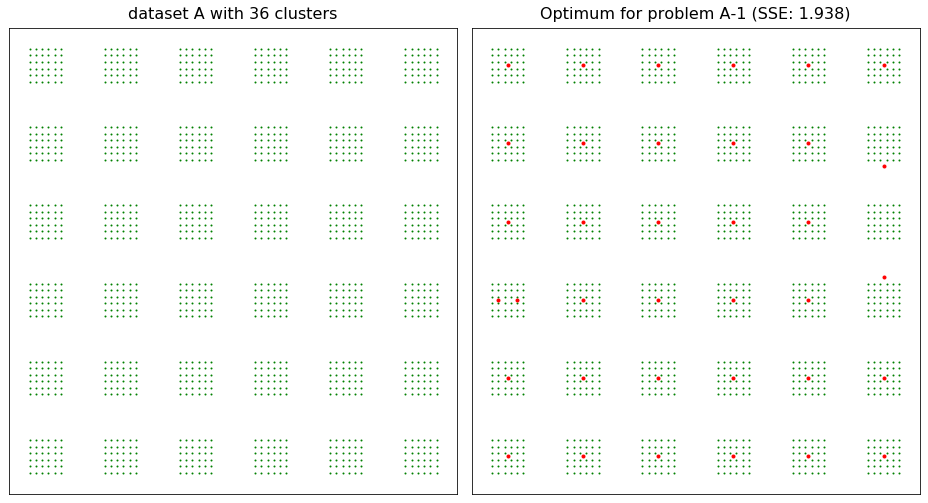

In [5]:
def fig_kmppa1_opt(): #rect
    D = dataset.grid(so=6,si=6,ratio=1,grid1=1,grid2=1)
    X=D.getData()
    D.kmeansplusplusInit()# initialize kmpp codebook 

    fig,axs = makeplot(1,2,figsize=(13,7.0))  
    plot3(ax=axs[0],X=X,C=None,
         cap="dataset A with 36 clusters")
    kmeans = KMeans(n_clusters=D.k, init=D.ibook) # run k-means++
    kmeans.fit(X)
    cmap=getMap(D.g,D.centers,kmeans.cluster_centers_,D.ratio)
    err=errorOf(kmeans.cluster_centers_,X)
    plot3(ax=axs[1],X=X,C=kmeans.cluster_centers_, cmap=None, centers=D.centers,boxlen=D.scale,
          cap="Optimum for problem A-1"+" (SSE: {val:.{acc}f})".format(val=err,acc=acc),voro=0)
    eqlim(axs)
    finish(fig,whoami(), write=0)
fig_kmppa1_opt()

# Figure: k-means for problem A-1

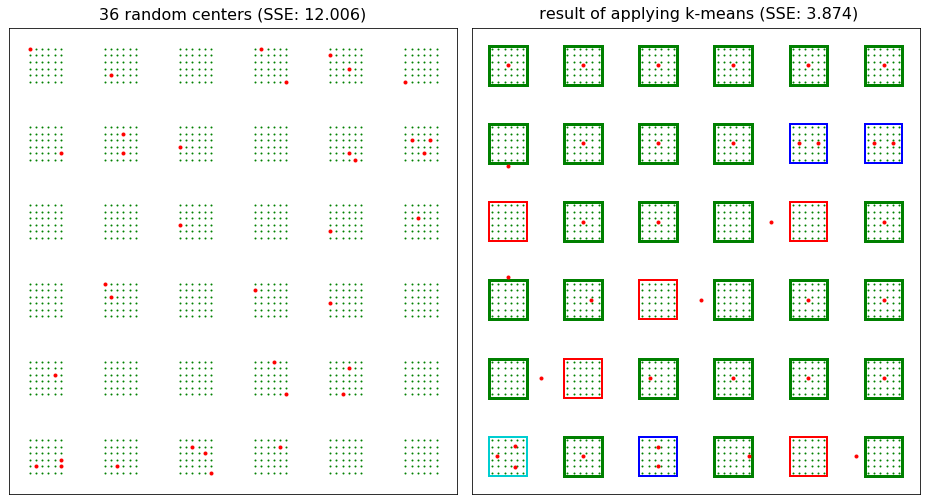

In [6]:
def fig_kma1():
    yp=1.02 # magic paramter for matplotlib caption position (please ignore)
    D = dataset.grid(so=6,si=6,ratio=1,grid1=1,grid2=1) # problem A-1
    X=D.getData()

    i=D.randomInit()# initialize random codebook 
    fig,axs = makeplot(1,2,figsize=(13,7.0))  
    err = errorOf(D.ibook,X)
    plot3(ax=axs[0],X=X,C=D.ibook,
          cap=str(D.k)+" random centers"+" (SSE: {val:.{acc}f})".format(val=err,acc=acc),ypos=yp)

    kmeans = KMeans(n_clusters=D.k, init=D.ibook) # run k-means++

    kmeans.fit(X)
    cmap=getMap(D.g,D.centers,kmeans.cluster_centers_, D.ratio)
    err = errorOf(kmeans.cluster_centers_,X)
    plot3(ax=axs[1],X=X,C=kmeans.cluster_centers_, cmap=cmap, centers=D.centers,boxlen=D.scale,
          cap=" result of applying k-means"+" (SSE: {val:.{acc}f})".format(val=err,acc=acc),ypos=yp, voro=0)
    finish(fig,whoami())
    eqlim(axs)


fig_kma1()

### font sizes in matplotlib

In [7]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 17}

matplotlib.rc('font', **font)

# Figure: k-means for problem A1 - brute force random

best = 1.9385416666666664 which is 32.96% worse than optimum 1.458
mean = 3.6854030703198473 which is 152.77% worse than optimum 1.458
distance of optimum and mean in sigmas: 3.38


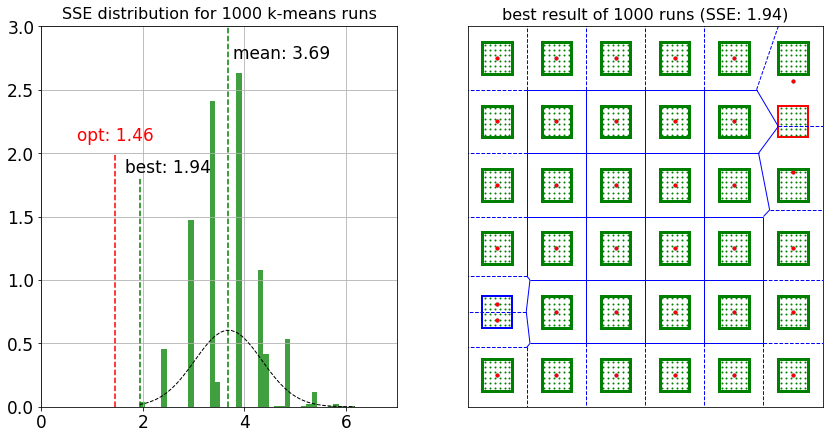

less than 2: 4


In [8]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
def fig_kma1_brute():
    acc=2
    yp=1.02
    #yp=0.9
    D = dataset.grid(so=6,si=6,ratio=1,grid1=1,grid2=1)
    X=D.getData()
    nn = 1000
    sol=[]
    errmin = float('inf')
    lt2 = 0;
    for i in range(nn):
        i=D.randomInit()# initialize random codebook 
        kmeans = KMeans(n_clusters=D.k, init=D.ibook) # run k-means++
        kmeans.fit(X)
        curerr = kmeans.inertia_
        sol.append(curerr)
        if curerr < 2:
            lt2+=1
        if curerr < errmin:
            Cbest = copy.deepcopy(kmeans.cluster_centers_)
            errmin = curerr
 

           
    fig,axs = makeplot(1,2,figsize=(14,7.0))  
    #print(sol)
    x = np.array(sol)
    m = np.min(x)
    mean=np.mean(x)
    # the histogram of the data
    ax=axs[0]
    n, bins, _ = ax.hist(x, 40, normed=1, facecolor='green', alpha=0.75)
    ax.axis([0, 7, 0, 3.0])
    ax.plot([1.458,1.458],[0,2],"--",color="red")
    #ax.plot([1.458,1.458],[0,4],"yo",color="red")
    ax.plot([m,m],[0,1.8],"b--", color="green")
    ax.plot([mean,mean],[0,mean],"b--", color="green")
    #ax.plot([m,m],[0,4],"bo", color="green")
    ax.grid(True)
    
    ypos=1.02
    fontsize=16
    cap = "SSE distribution for 1000 k-means runs"
    if cap!=None:
        plt.text(0.5, ypos, cap,
        horizontalalignment='center',
        fontsize=fontsize,
        transform = ax.transAxes)
    opt=1.458
    ax.text(0.7,2.1,"opt: {val:.{acc}f}".format(val=opt,acc=2),color="red",fontdict=font)
    ax.text(m-0.3,1.85,"best: {val:.{acc}f}".format(val=m,acc=acc),color="black",fontdict=font)
    ax.text(mean+0.1,2.75,"mean: {val:.{acc}f}".format(val=mean,acc=acc),color="black",fontdict=font)
    
    # add a 'best fit' line
    
    y = mlab.normpdf( bins, mean, np.std(sol))
    l = ax.plot(bins, y, 'r--', linewidth=1,color="black")

    print("best = {} which is {:.2%} worse than optimum {}".format(m,(m/opt-1),opt))
    print("mean = {} which is {:.2%} worse than optimum {}".format(mean,(mean/opt-1),opt))
    print("distance of optimum and mean in sigmas: {:.2f}".format((mean-opt)/np.std(sol)))

    cmap=getMap(D.g,D.centers,Cbest, D.ratio)
    plot3(ax=axs[1],X=X,C=Cbest, cmap=cmap, centers=D.centers,boxlen=D.scale,
          cap="best result of {} runs".format(nn)+" (SSE: {val:.{acc}f})".format(val=errmin,acc=acc),voro=1)

    plt.show()
    finish(fig,whoami(),write=0)
    print("less than 2:", lt2)
    #eqlim(axs)


fig_kma1_brute();

# Figure: k-means++ for problem A1
Pro tip: set n_init to 1 to see some non-optimal solutions (nearly 50% of the cases)

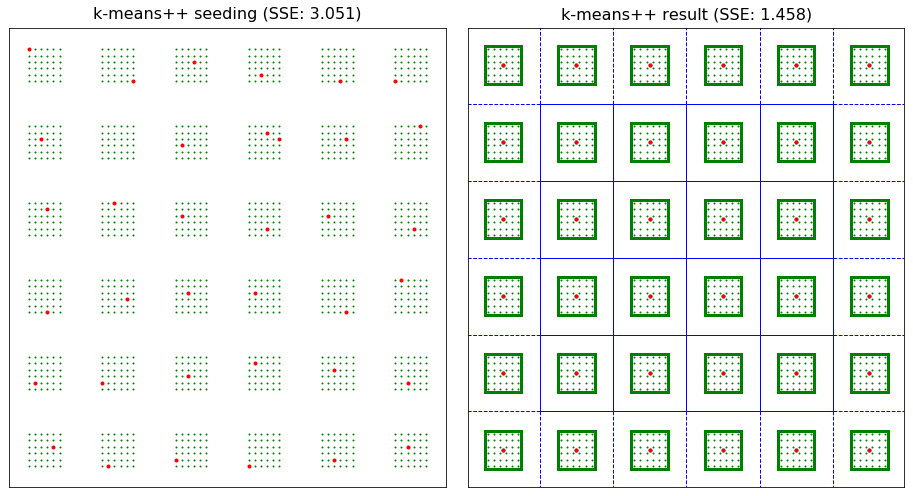

In [9]:
def fig_kmppa1opt(doplot=True, n_init=10): #rect
    D = dataset.grid(so=6,si=6,ratio=1,grid1=1,grid2=1,relsize=0.5)
    X=D.getData()
    D.kmeansplusplusInit()# initialize kmpp codebook, only used for graphics here
    err=errorOf(D.ibook,X)

    if doplot:
        fig,axs = makeplot(1,2,figsize=(13,7.0))  
        plot3(ax=axs[0],X=X,C=D.ibook,
         cap="k-means++ seeding"+" (SSE: {val:.{acc}f})".format(val=err,acc=acc))
    
    kmeans = KMeans(n_clusters=D.k, n_init=n_init) # run k-means++
    kmeans.fit(X)
    cmap=getMap(D.g,D.centers,kmeans.cluster_centers_,D.ratio)
    err=errorOf(kmeans.cluster_centers_,X)
    
    if doplot:
        plot3(ax=axs[1],X=X,C=kmeans.cluster_centers_, cmap=cmap, centers=D.centers,boxlen=D.scale,
          cap="k-means++ result"+" (SSE: {val:.{acc}f})".format(val=err,acc=acc),voro=1)
        eqlim(axs)
        finish(fig,whoami(),write=0)
        return(fig)
    else:
        return(err)
fig_kmppa1opt();

## check (for n_init=1) how often the optimal solution, 1 empty cluster and more empty clusters are found

In [10]:
def test1(n):
    opti=0
    subopti1=0
    suboptin=0
    maxx = 0
    for i in range(n):
        err = fig_kmppa1opt(doplot=False, n_init=1)
        maxx=max(maxx,err)
        if err < 1.6:
            opti+=1
        elif err < 2:
            subopti1+=1
        else:
            suboptin+=1
    print(maxx, opti/n, subopti1/n,suboptin/n)
test1(100)

2.45760102309 0.41 0.55 0.04


## k-means++ - show seeding sequence with probability
* white shading: high distance/placement probability
* black shading: low distance/placement propability
* large red dot: most recently inserted center
* white dot: next center to be inserted

In [11]:
import colorcet as cc
# make a contour plot based on minimum squared distance of each point in X to any of the centers in C
def cplot(X,ax,fig,C):
    x=X[:,0]
    y=X[:,1]
    # initialize minimum distance mdis with very high values
    mdis=np.ones_like(x)*1000000
    # look over codebook
    for c in C:
        # compute squared distance to c for each value of X
        delta=(X-c)
        dis = np.linalg.norm(delta,axis=1)
        z = dis**2;
        # minimum operation with minima so far
        mdis=np.minimum(mdis,z)
    z = mdis
    levels = np.linspace(-0.2, max(z), 200)
    levels = np.linspace(-0.08, max(z)*0.985, 200)
    #levels = np.linspace(-0.2, 0.6, 200)

    cmap="bone"
    cs = ax.contourf(x.reshape([30,30]), y.reshape([30,30]), z.reshape([30,30]), levels=levels, cmap=cmap)


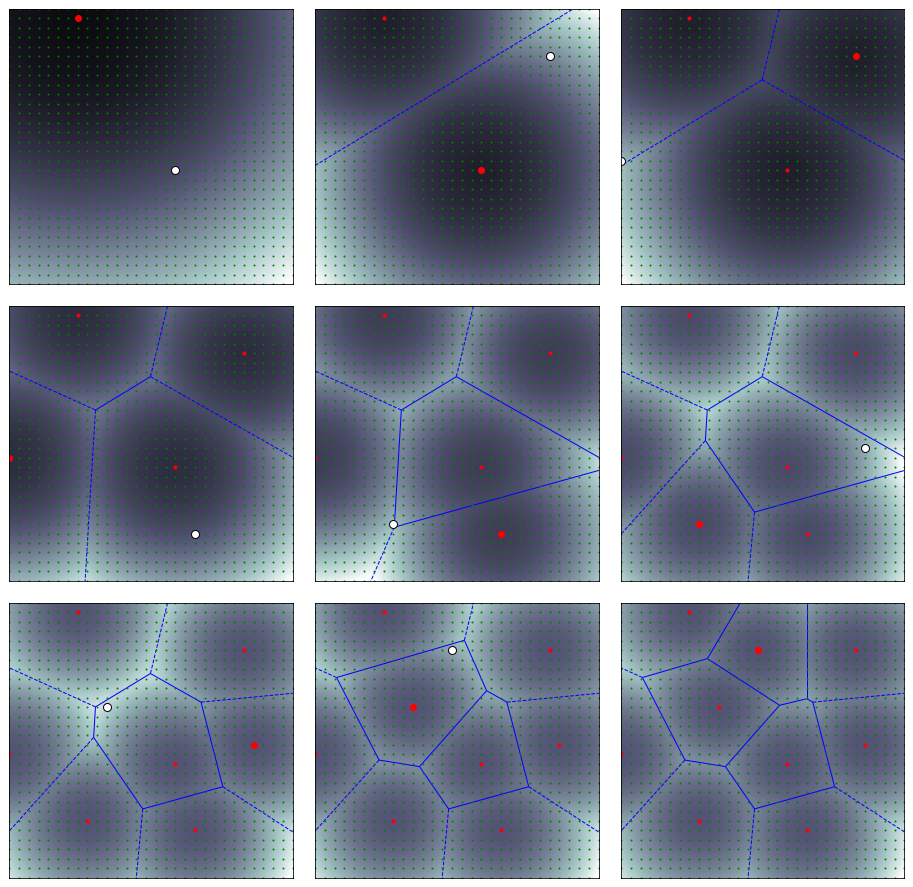

In [12]:
def fig_kmpp_cont(): #rect
    #D = dataset.grid(so=3,si=10,ratio=1,grid1=1,grid2=1)
    D = dataset.grid(so=1,si=30,ratio=9,grid1=1,grid2=1)
    X=D.getData()
    D.kmeansplusplusInit()# initialize kmpp codebook 

    fig,axs = makeplot(3,3,figsize=(13,13)) 
    for i,ax in enumerate(axs.flat):
        #contourplot for vector i
        cplot(X,ax,fig,D.ibook[:i+1])
        if i == 9:
            noticks(ax)
            continue;
        plot3(ax=ax,X=X,C=D.ibook[:i+1],
             cap="")
        if i>1:
            vor = Voronoi(D.ibook[:i+1])
            voronoi_plot_2d(vor,ax=ax, show_vertices=False, show_points=False,line_colors="blue")
        elif i==1:
            m = (D.ibook[0]+D.ibook[1])/2
            p = D.ibook[0]-D.ibook[1] # p1 p2
            q = np.array((-p[1],p[0])) # orthogonal
            q/=np.linalg.norm(q)
            ax.plot((m[0]+q[0],m[0]-q[0]),(m[1]+q[1],m[1]-q[1]),"b--", ms=6,lw=1)
            #ax.plot(m[0],m[1],"yo", ms=6)
        x,y=D.ibook[i]
        ax.plot(x,y,"ro", ms=6)
        if i+1 < D.k:
            x,y=D.ibook[i+1]
            ax.plot(x,y,"o", ms=8,color="white",markeredgecolor="black")
    eqlim(axs)
    finish(fig,whoami(),write=0)
fig_kmpp_cont()

## k-means++ for problem A4

In [13]:
acc=3

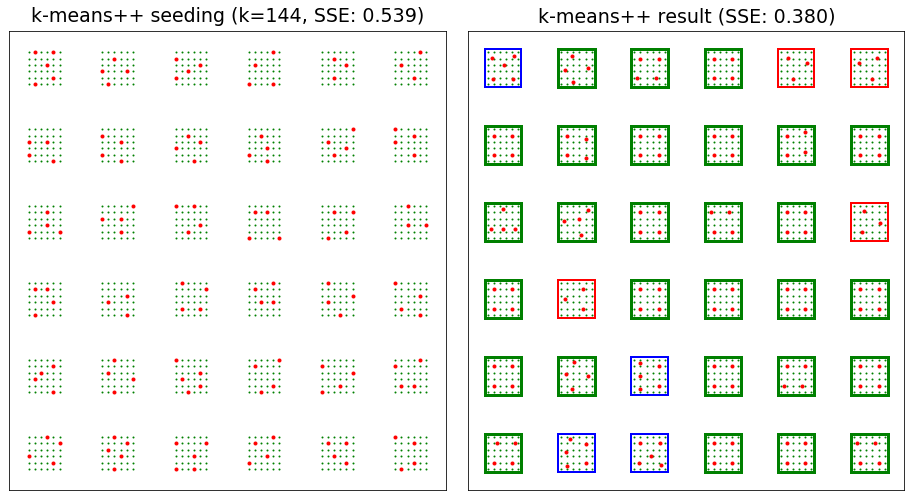

In [14]:
def fig_kmppa4():
    D = dataset.grid(so=6,si=6,ratio=4,grid1=1,grid2=1)
    X=D.getData()

    D.kmeansplusplusInit()# initialize kmpp codebook 

    fig,axs = makeplot(1,2,figsize=(13,7.0))  
    err=errorOf(D.ibook,X)
    plot3(ax=axs[0],X=X,C=D.ibook,fontsize=19,
          cap="k-means++ seeding"+" (k=144, SSE: {val:.{acc}f})".format(val=err,acc=acc))

    kmeans = KMeans(n_clusters=D.k, init=D.ibook) # run k-means++
    kmeans.fit(X)
    cmap=getMap(D.g,D.centers,kmeans.cluster_centers_,D.ratio)
    err=errorOf(kmeans.cluster_centers_,X)
    plot3(ax=axs[1],X=X,C=kmeans.cluster_centers_, cmap=cmap, centers=D.centers,boxlen=D.scale,
          fontsize=19,
          cap="k-means++ result"+" (SSE: {val:.{acc}f})".format(val=err,acc=acc))

    eqlim(axs)
    finish(fig,whoami(),write=0)

fig_kmppa4()

## sequence of steps

In [15]:
# arrow on ax from p1 to p2
def myarrow(ax,p1,p2):
    dx=p2[0]-p1[0]
    dy=p2[1]-p1[1]
    ax.arrow(p1[0], p1[1], dx, dy,head_width=0.03,head_length=0.03, 
             color="black", length_includes_head=True, fill=True, zorder=1000,lw=2)
    
# make plots of non-lopcal jumps
def fig_arrows(dd,km,star=0,write=0, cols=3):
    # what went wrong
    #cols=3
    D = dd
    X=D.getData()
    keys = km.uhist.keys()
    L = math.ceil(len(keys)/cols)
    if cols == 3:
        fig,axs = makeplot(L,cols,figsize=(22,8*L))
    elif cols == 4:
        fig,axs = makeplot(L,cols,figsize=(22,8*L*0.8))
    fig.subplots_adjust(bottom=0.1,wspace=0.1,hspace=0.10,top=0.80)
    #print("len keys = {}, L ={}".format(len(keys),L))
    #print(keys)
    axs=axs.flatten()
    for ax in axs:
        noticks(ax)

    for k in keys:# 0 .....n
        #print("k = ",k)
        #uhist[len(uhist)]=
        #{"codebook":cc,"i_mu":i_maxerr,"i_lambda":i_minutil,"regular":True,"jumps":uruns, "algo":algo}
        ddd=km.uhist[k]
        #print(ddd)
        C=ddd["codebook"]
        i_m=ddd["i_mu"]
        i_l=ddd["i_lambda"]
        regular=ddd["regular"]
        uruns=ddd["jumps"]
        algo=ddd["algo"]
        #C,i_m,i_l,regular,uruns = km.uhist[k]
        cmap=getMap(D.g,D.centers,C,D.ratio)
        if k==len(keys):
            cap = "result after " +"jump #"+str(k-1)+" (SSE: %.4f)"%errorOf(C,X)
        elif k==len(keys)-2:
            cap = "final result: (SSE: %.4f)"%errorOf(C,X)
            #[i.set_linewidth(2.1) for i in axs[k-1].spines.itervalues()]
            for axis in ['top','bottom','left','right']:
                axs[k].spines[axis].set_linewidth(3.5)
                axs[k].spines[axis].set_color("black")
        else:
            cap = "Jump #"+str(uruns)+" (SSE: %.4f)"%errorOf(C,X)
        if not regular:
            if k==len(keys)-1:
                cap = "done after #"+str(uruns)+" (SSE: %.4f)"%errorOf(C,X)
                framecol="red"
            else:
                cap = "stuck after #"+str(uruns)+" (SSE: %.4f)"%errorOf(C,X)
                framecol="orange"
            for axis in ['top','bottom','left','right']:
                axs[k].spines[axis].set_linewidth(2.5)
                axs[k].spines[axis].set_color(framecol)
            
        plot3(ax=axs[k],X=X,C=C, cmap=cmap, centers=D.centers,boxlen=D.scale,
              cap=cap,fontsize=20, voro=1)
        if k < len(keys) and i_l != i_m:
            axs[k].plot(C[i_m][0],C[i_m][1],"ro", ms=6)
            axs[k].plot(C[i_l][0],C[i_l][1],"ro", ms=6)
            #axs[k-1].plot([C[i_l][0],C[i_m][0]],[C[i_l][1],C[i_m][1]],"b-")
            try:
                myarrow(axs[k],C[i_l],C[i_m])
            except ValueError:
                print("what? i_l = {} i_m={}".format(i_l,i_m))

        
    eqlim(axs)
    finish(fig,whoami()+algo+"XX",tight=0, write=write, pad_inches=0.5)
    

## k-means-u or k-means-u* for problem A1

In [16]:
def fig_kmua1(retry=0,doplot=1):
    acc=3
    if doplot:
        fig,axs = makeplot(1,2,figsize=(13,7.0))  
    #D = dataset.grid(so=6,si=6,ratio=12,grid1=1,grid2=1)
    #D = dataset.grid(so=1,si=5,ratio=4,grid1=1,grid2=1)
    
    D = dataset.grid(so=6,si=6,ratio=1,grid1=1,grid2=1, relsize=0.5)
    
    #D = dataset.grid(so=6,si=6,ratio=4,grid1=0,grid2=0, relsize=0.5)
    #D = dataset.grid(so=6,si=6,ratio=6,grid1=1,grid2=1)
    #D = dataset( n=2000,g=10,sig=0.01)
    #D = dataset.gaussmix(n=1000,g=36,k=400,grid1=False,grid2=False,sig=0.1)        

    X=D.getData()
    #print("D.n=",D.n)
    
    D.kmeansplusplusInit()# initialize kmpp codebook 

    n_init=1
    #print("n_init=",n_init)
    kmeans = KMeans(n_clusters=D.k,n_init=n_init) # run k-means++
    kmeans.fit(X)
    err1=errorOf(kmeans.cluster_centers_,X)
    if D.ratio > 0:
        cmap=getMap(D.g,D.centers,kmeans.cluster_centers_,D.ratio)
    else:
        cmap=None
    cap = "k-means++ result"+" (ratio: 1, SSE: {val:.{acc}f})".format(val=err1,acc=acc)
    cap = "k-means++ result"+" (SSE: {val:.{acc}f})".format(val=err1,acc=acc)
    if doplot:
        plot3(ax=axs[0],X=X,C=kmeans.cluster_centers_, cmap=cmap, centers=D.centers,boxlen=D.scale,
          cap=cap,voro=1)

    maxRetry=retry
    if maxRetry > 0:
        star = "*"
        ending="_kms"
    else:
        star = ""
        ending="_kmu"
    kmeans = kmeansU(X,kmeans, store=1, maxRetry=maxRetry,loud=1)   # result from k-means-u
    err2=errorOf(kmeans.cluster_centers_,X)
    s=": -{:.2%}".format(1.0-err2/err1)
    cmap=None if not D.grid2 else getMap(D.g,D.centers,kmeans.cluster_centers_,D.ratio)
    if doplot:
        plot3(ax=axs[1],X=X,C=kmeans.cluster_centers_, cmap=cmap, centers=D.centers,boxlen=D.scale,
          cap="k-means-u"+star+" result"+" (SSE: {val:.{acc}f})".format(val=err2,acc=acc)+s, voro=1)

        eqlim(axs)

    
        finish(fig,whoami()+ending,write=0)
        return D,kmeans #kmeans.cluster_centers_
    else:
        return (err2)


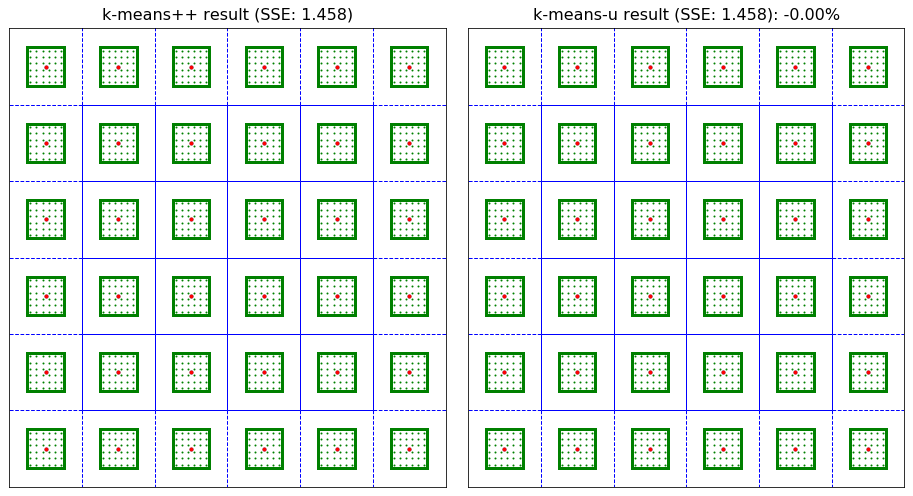

In [17]:
fig_kmua1();

In [18]:
def test2(n):
    opti=0
    subopti1=0
    suboptin=0
    maxx = 0
    for i in range(n):
        err = fig_kmua1(doplot=False)
        maxx=max(maxx,err)
        if err < 1.6:
            opti+=1
        elif err < 2:
            subopti1+=1
        else:
            suboptin+=1
    print(maxx, opti/n, subopti1/n,suboptin/n)
test2(100)

same same 12
1.92708333333 0.99 0.01 0.0


## k-means-u or k-means-u* for problem A4

In [19]:
def fig_kmua4(retry=0):
    acc=4
    fig,axs = makeplot(1,2,figsize=(13,7.0))  
    #D = dataset.grid(so=6,si=6,ratio=12,grid1=1,grid2=1)
    #D = dataset.grid(so=1,si=5,ratio=4,grid1=1,grid2=1)
    
    D = dataset.grid(so=6,si=6,ratio=4,grid1=1,grid2=1, relsize=0.5)
    
    #D = dataset.grid(so=6,si=6,ratio=4,grid1=0,grid2=0, relsize=0.5)
    #D = dataset.grid(so=6,si=6,ratio=6,grid1=1,grid2=1)
    #D = dataset( n=2000,g=10,sig=0.01)
    #D = dataset.gaussmix(n=1000,g=36,k=400,grid1=False,grid2=False,sig=0.1)        

    X=D.getData()
    #print("D.n=",D.n)
    
    D.kmeansplusplusInit()# initialize kmpp codebook 

    n_init=10
    #print("n_init=",n_init)
    kmeans = KMeans(n_clusters=D.k,n_init=n_init) # run k-means++
    kmeans.fit(X)
    err1=errorOf(kmeans.cluster_centers_,X)
    if D.ratio > 0:
        cmap=getMap(D.g,D.centers,kmeans.cluster_centers_,D.ratio)
    else:
        cmap=None
    cap = "k-means++ result"+" (ratio: 4, SSE: {val:.{acc}f})".format(val=err1,acc=acc)
    cap = "k-means++ result"+" (SSE: {val:.{acc}f})".format(val=err1,acc=acc)
    plot3(ax=axs[0],X=X,C=kmeans.cluster_centers_, cmap=cmap, centers=D.centers,boxlen=D.scale,
          cap=cap,voro=1)

    maxRetry=retry
    if maxRetry > 0:
        star = "*"
        ending="_kms"
    else:
        star = ""
        ending="_kmu"
    kmeans = kmeansU(X,kmeans, store=1, maxRetry=maxRetry,loud=1)   # result from k-means-u
    err2=errorOf(kmeans.cluster_centers_,X)
    s=": -{:.2%}".format(1.0-err2/err1)
    cmap=None if not D.grid2 else getMap(D.g,D.centers,kmeans.cluster_centers_,D.ratio)
    plot3(ax=axs[1],X=X,C=kmeans.cluster_centers_, cmap=cmap, centers=D.centers,boxlen=D.scale,
          cap="k-means-u"+star+" result"+" (SSE: {val:.{acc}f})".format(val=err2,acc=acc)+s, voro=1)

    eqlim(axs)

    
    finish(fig,whoami()+ending,write=0)
    return D,kmeans #kmeans.cluster_centers_

## k-means-u for problem $A$-4

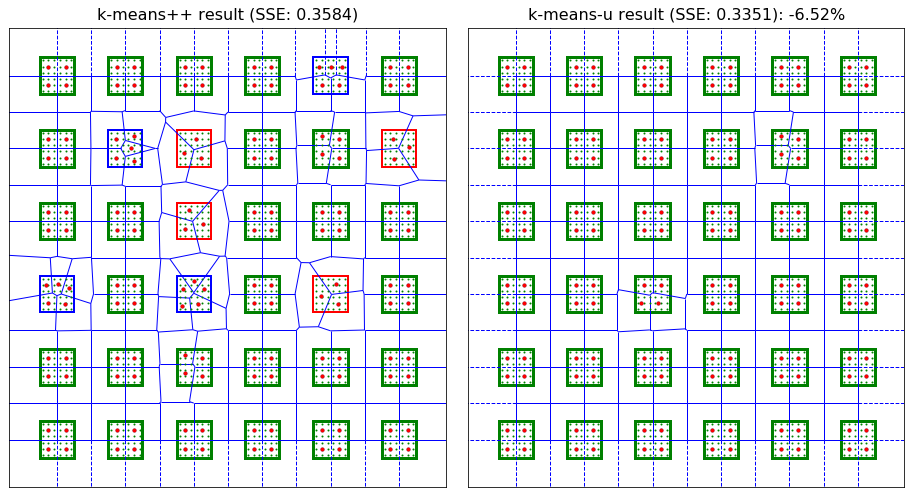

In [20]:
#dd,cb=fig_kmua4()
dd0,km0=fig_kmua4(0) # kmu
#print(km0.uhist.keys())
#" (SSE: {val:.{acc}f})".format(val=err,acc=acc)

## k-means-u  - jump by jump
How did the algorithm arrive at the above solution?

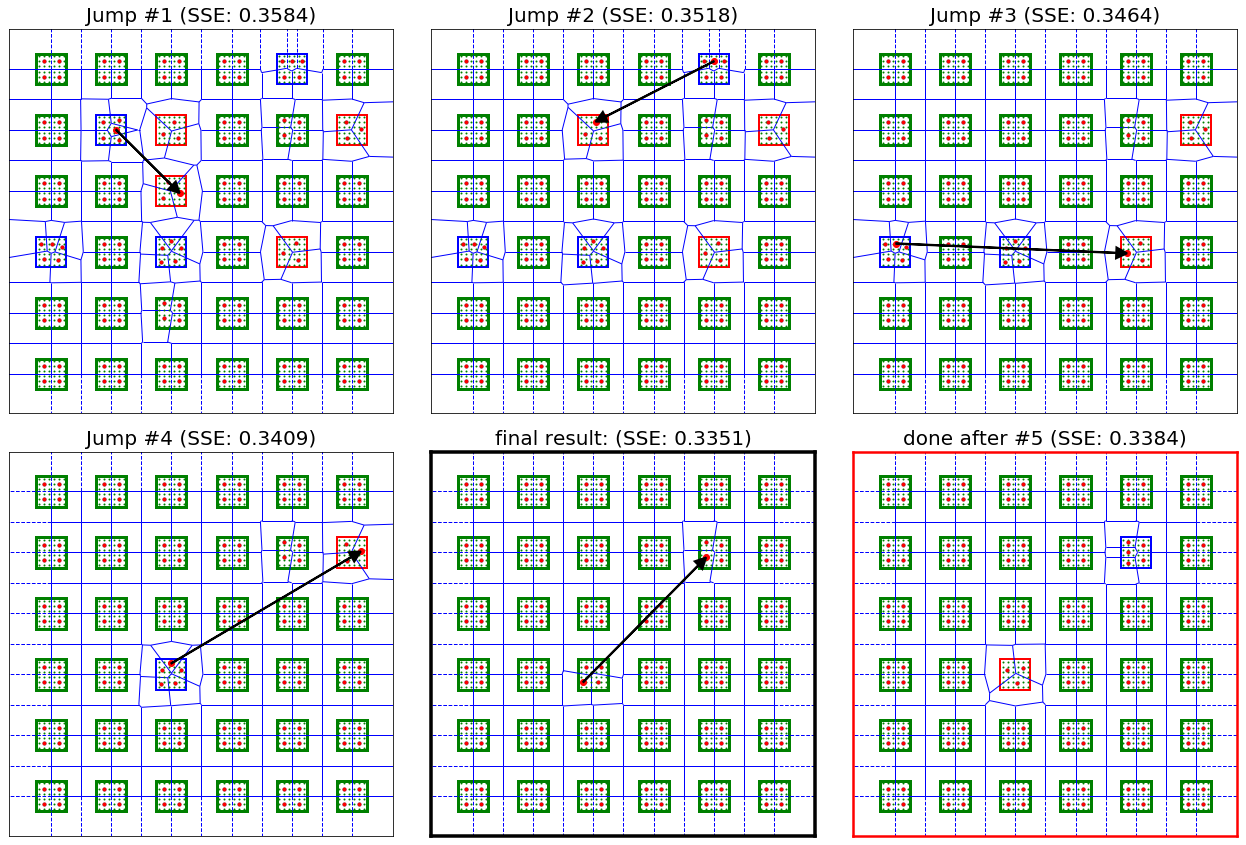

In [21]:
fig_arrows(dd0,km0,write=0, cols=3)  

## k-means-u* for problem $A$-4
searching for an example with at least one successful retry

retry # 1
successful retry: 1 0.333333333333
retry # 1
1


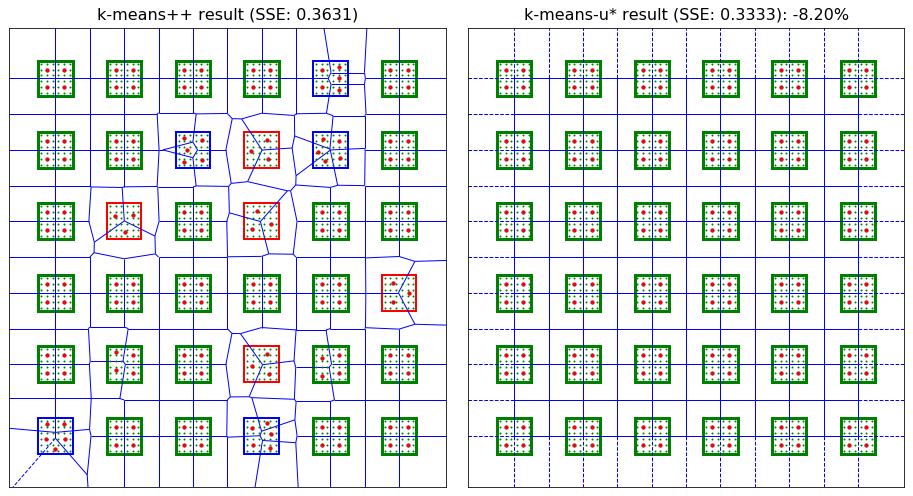

In [22]:
while True:
    dd1,km1=fig_kmua4(1) #k-means-u*
    if km1.successfulRetries_ > 0:
        break
    
print(km1.successfulRetries_)


## k-means-u*  - jump by jump
How did the algorithm arrive at the above solution?

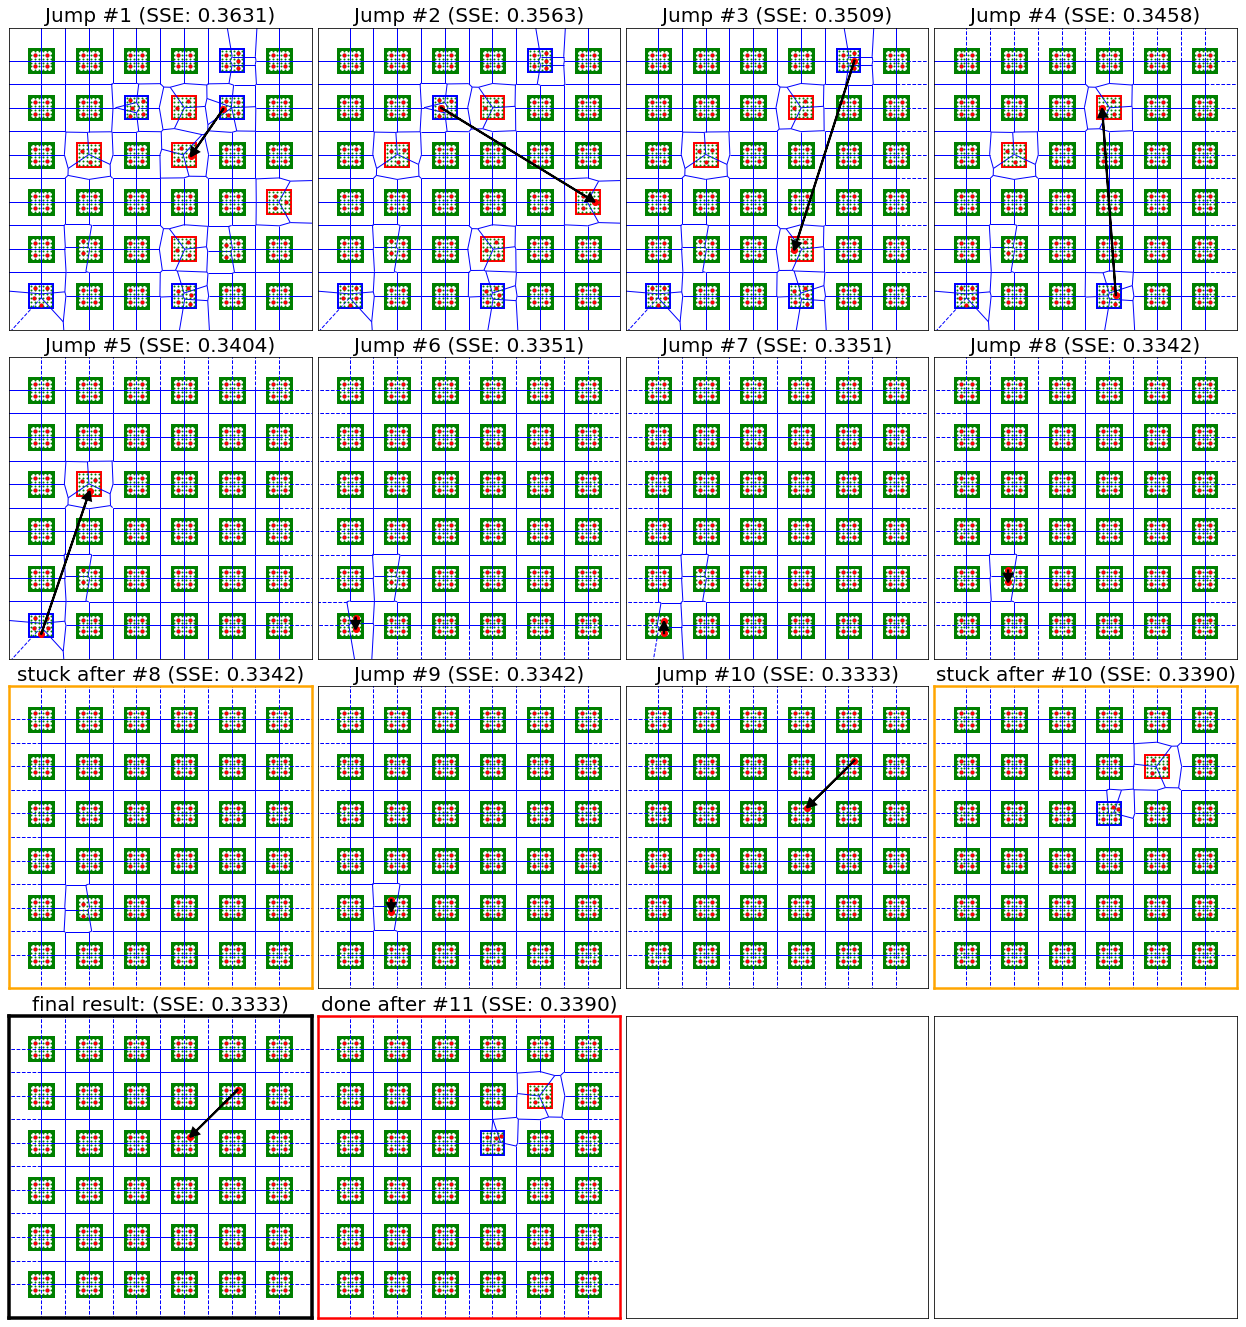

In [23]:
f = fig_arrows(dd1,km1,write=0, cols=4) 
plt.subplots_adjust(wspace=0.02, hspace=0.09)

## k-means-u* for gaussian mixture similar to problem A-4

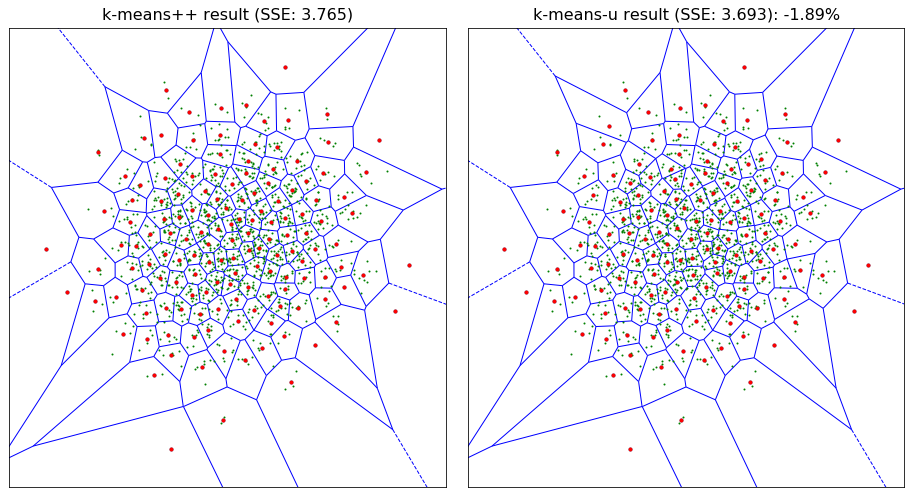

In [24]:
def fig_kmua4gmm():
    acc=3
    fig,axs = makeplot(1,2,figsize=(13,7.0))  
    #D = dataset.grid(so=6,si=6,ratio=12,grid1=1,grid2=1)
    #D = dataset.grid(so=1,si=5,ratio=4,grid1=1,grid2=1)
    #D = dataset.grid(so=6,si=6,ratio=4,grid1=1,grid2=1, relsize=0.5)
    
    D = dataset.grid(so=6,si=6,ratio=4,grid1=0,grid2=0, relsize=0.5)
    #D = dataset.grid(so=6,si=6,ratio=6,grid1=1,grid2=1)
    #D = dataset( n=2000,g=10,sig=0.01)
    #D = dataset.gaussmix(n=1000,g=36,k=400,grid1=False,grid2=False,sig=0.1)        

    X=D.getData()
    #print("D.n=",D.n)
    
    D.kmeansplusplusInit()# initialize kmpp codebook 

    n_init=10
    #print("n_init=",n_init)
    kmeans = KMeans(n_clusters=D.k,n_init=n_init) # run k-means++
    kmeans.fit(X)
    err1=errorOf(kmeans.cluster_centers_,X)
    if D.ratio > 0:
        cmap=getMap(D.g,D.centers,kmeans.cluster_centers_,D.ratio)
    else:
        cmap=None
    cap = "k-means++ result"+" (ratio: 4, SSE: {val:.{acc}f})".format(val=err1,acc=acc)
    cap = "k-means++ result"+" (SSE: {val:.{acc}f})".format(val=err1,acc=acc)
    plot3(ax=axs[0],X=X,C=kmeans.cluster_centers_, cmap=cmap, centers=D.centers,boxlen=D.scale,
          cap=cap,voro=1)

    maxRetry=0
    if maxRetry > 0:
        star = "*"
    else:
        star = ""
    kmeans = kmeansU(X,kmeans, store=1, maxRetry=maxRetry)   # result from k-means-u
    err2=errorOf(kmeans.cluster_centers_,X)
    s=": -{:.2%}".format(1.0-err2/err1)
    cmap=None if not D.grid2 else getMap(D.g,D.centers,kmeans.cluster_centers_,D.ratio)
    plot3(ax=axs[1],X=X,C=kmeans.cluster_centers_, cmap=cmap, centers=D.centers,boxlen=D.scale,
          cap="k-means-u"+star+" result"+" (SSE: {val:.{acc}f})".format(val=err2,acc=acc)+s, voro=1)

    eqlim(axs)

    finish(fig,whoami()+"GMM",write=0)
    return D,kmeans #kmeans.cluster_centers_


dd,km=fig_kmua4gmm();

## k-means-u some gaussians

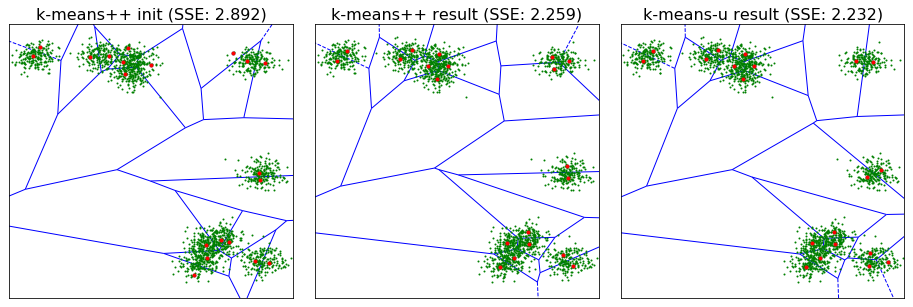

In [25]:
def fig_gaus():
    D = dataset.gaussmix(n=2000,g=10,k=20,sig=0.001)
    X=D.getData()
    i=D.kmeansplusplusInit()# initialize kmpp codebook 

    fig,axs = makeplot(1,3,figsize=(13,4.3))  

    plot3(ax=axs[0],X=X,C=D.ibook,
          cap="k-means++ init"+" (SSE: %.3f)"%errorOf(D.ibook,X),voro=1)
    kmeans = KMeans(n_clusters=D.k, init=D.ibook) # run k-means++
    kmeans.fit(X)
    vor = Voronoi(kmeans.cluster_centers_)
    plot3(ax=axs[1],X=X,C=kmeans.cluster_centers_, 
          cap="k-means++ result"+" (SSE: %.3f)"%errorOf(kmeans.cluster_centers_,X),voro=1)
    kmeans = kmeansU(X,kmeans)   # result from k-means-u
    plot3(ax=axs[2],X=X,C=kmeans.cluster_centers_, 
          cap="k-means-u result"+" (SSE: %.3f)"%errorOf(kmeans.cluster_centers_,X),voro=1)
    eqlim(axs)
    finish(fig,whoami())


fig_gaus()

## 1D Data

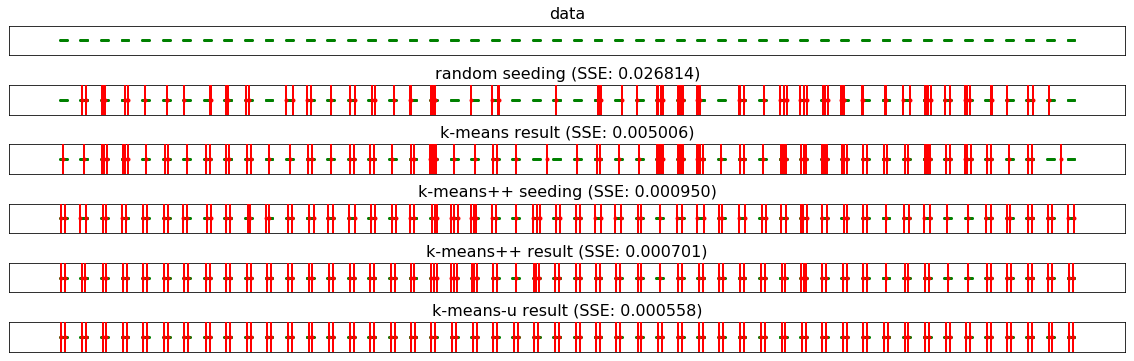

In [26]:
def oneD():
    g=200
    g=50
    ratio = 2
    si = 10
    relsize=0.4
    acc=6
    D =dataset.grid1D(g, si,ratio,relsize=relsize)
    X=D.getData()
    i=0
    fig,axs = makeplot(6,1,figsize=(20,6.0)) 

    ypos=1.22
    plot3(ax=axs[i],X=X,C=None, cmap=None, centers=None,boxlen=None,dotsize=4,
          cap="data",voro=0,ypos=ypos)
    i+=1
    D.randomInit()
    err=errorOf(D.ibook,X)
    plot3(ax=axs[i],X=X,C=D.ibook,vbar=1,dotsize=4,
         cap="random seeding"+" (SSE: {val:.{acc}f})".format(val=err,acc=acc),ypos=ypos)
    i+=1
    kmeans = KMeans(n_clusters=g*ratio,init=D.ibook) # run k-means++
    kmeans.fit(X)
    err=errorOf(kmeans.cluster_centers_,X)

    plot3(ax=axs[i],X=X,C=kmeans.cluster_centers_, cmap=None, centers=None,boxlen=None,vbar=1,dotsize=4,
          cap="k-means result"+" (SSE: {val:.{acc}f})".format(val=err,acc=acc),voro=0,ypos=ypos)
    i+=1

    D.kmeansplusplusInit()
    err=errorOf(D.ibook,X)
    plot3(ax=axs[i],X=X,C=D.ibook,vbar=1,dotsize=4,
         cap="k-means++ seeding"+" (SSE: {val:.{acc}f})".format(val=err,acc=acc),ypos=ypos)
    i+=1
    kmeans = KMeans(n_clusters=g*ratio,init=D.ibook) # run k-means++
    kmeans.fit(X)
    err=errorOf(kmeans.cluster_centers_,X)

    plot3(ax=axs[i],X=X,C=kmeans.cluster_centers_, cmap=None, centers=None,boxlen=None,vbar=1,dotsize=4,
          cap="k-means++ result"+" (SSE: {val:.{acc}f})".format(val=err,acc=acc),voro=0,ypos=ypos)

    i+=1
    kmeans = kmeansU(X,kmeans,store=1)   # result from k-means-u
    err = kmeans.inertia_       # error from k-means-u
    Cfinal = copy.deepcopy(kmeans.cluster_centers_) #possibly improved by k-means-u
    plot3(ax=axs[i],X=X,C=kmeans.cluster_centers_, cmap=None, centers=None,boxlen=None,vbar=1,dotsize=4,
          cap="k-means-u result"+" (SSE: {val:.{acc}f})".format(val=err,acc=acc),voro=0,ypos=ypos)


    fig.subplots_adjust(hspace=1, wspace=0)
    finish(fig,whoami(), write=0, tight=0)

oneD()


## theoretical guarantee for  k-means++ computed for different values of k
bound from http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf

In [27]:
import math 
print ("k, k-means++ guarantee")
for k in range(6,110,6):
    print (k, 8*(math.log(k)+2))

k, k-means++ guarantee
6 30.33407575382444
12 35.879253198304
18 39.122974063169316
24 41.42443064278356
30 43.20957905329725
36 44.66815150764888
42 45.901356946266944
48 46.969608087263126
54 47.911872372514196
60 48.7547564977768
66 49.5172379362114
72 50.21332895212844
78 50.853670613516734
84 51.44653439074651
90 51.99847736264212
96 52.51478553174269
102 52.999782506274165
108 53.45704981699376
